age:Customer age
job:type of job
marital:marital status
education level:education level
default:has credit in default?
balance:balance level
housing:has housing loan?
loan:has personal loan?
Contract:contact communication type
day:last contact day of the week
month:last contact month of year
duration:last contact duration, in seconds
campign:number of contacts performed during this campaign and for this client
pdays:number of days that passed by after the client was last contacted from a previous campaign
previous:number of contacts performed before this campaign and for this client
poutcome:outcome of the previous marketing campaign
y:has the client subscribed a term deposit?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
data=pd.read_csv('bank-full.csv',sep=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


# Handling Missing/Unknown Values

In [8]:
attrib,counts=np.unique(data['job'],return_counts=True)
for i in range(len(attrib)):
    print(attrib[i],':',counts[i])

admin. : 5171
blue-collar : 9732
entrepreneur : 1487
housemaid : 1240
management : 9458
retired : 2264
self-employed : 1579
services : 4154
student : 938
technician : 7597
unemployed : 1303
unknown : 288


In [9]:
#Replace unknown jobs by others
data['job'] = data['job'].replace(['unknown'],'other')

In [10]:
attrib,counts=np.unique(data['marital'],return_counts=True)
for i in range(len(attrib)):
    print(attrib[i],':',counts[i])

divorced : 5207
married : 27214
single : 12790


In [11]:
attrib,counts=np.unique(data['education'],return_counts=True)
for i in range(len(attrib)):
    print(attrib[i],':',counts[i])

primary : 6851
secondary : 23202
tertiary : 13301
unknown : 1857


In [12]:
#Replace unknown education by others
data['education'] = data['education'].replace(['unknown'],'other')

In [13]:
attrib,counts=np.unique(data['poutcome'],return_counts=True)
for i in range(len(attrib)):
    print(attrib[i],':',counts[i])

failure : 4901
other : 1840
success : 1511
unknown : 36959


In [14]:
data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [15]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [16]:
print('Oldest person who subscribed:',data[data['y']==1]['age'].max())
print('Youngest person who subscribed:',data[data['y']==1]['age'].min())
print('Average person who subscribed:',data[data['y']==1]['age'].mean())

Oldest person who subscribed: nan
Youngest person who subscribed: nan
Average person who subscribed: nan


In [17]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: job, dtype: int64

# ---------------------------EDA----------------

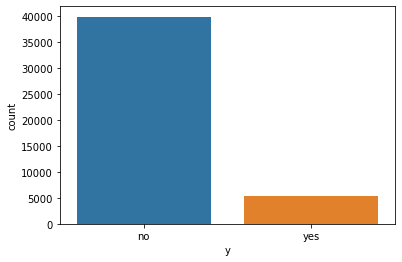

In [18]:
sns.countplot('y',data=data)
plt.show()

From the above graph it is clear that the answer of many person was no.
Out of 45211 persons in dataset only about , 5000 persons answer was yes.

In [19]:
data.groupby(['job', 'y'])['y'].count()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
other          no      254
               yes      34
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
Name: y, dtype: int64

In [20]:
data['y'].replace({'no':0,'yes':1},inplace=True)

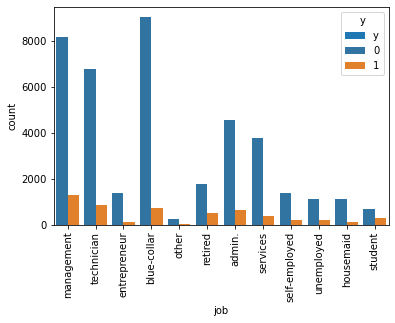

In [21]:
data[['job','y']].groupby(['job']).mean().plot.bar()
sns.countplot('job',hue='y',data=data)
plt.show()

 Seems like the ratio of subscription is not depending on the type of job.
 lets explore more

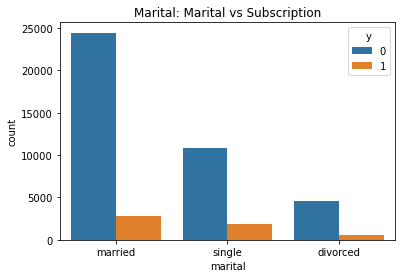

In [22]:
sns.countplot('marital', hue='y', data=data)
plt.title('Marital: Marital vs Subscription')
plt.show()

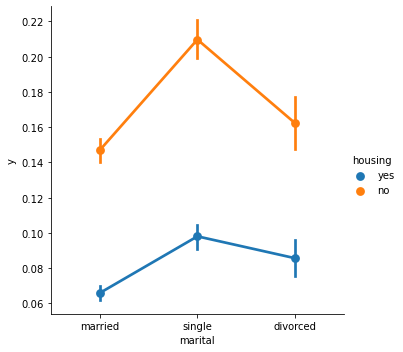

In [23]:
sns.factorplot('marital', 'y', hue='housing', data=data)
plt.show()

Now this seems intresting.The subscription ratio of single marital seems high then divorced and married.This can be our important feature.

In [24]:
data.duration.max()

4918

In [25]:
data['duration'] = data['duration'].apply(lambda n:n/60).round(2)

In [26]:
data.duration.max()

81.97

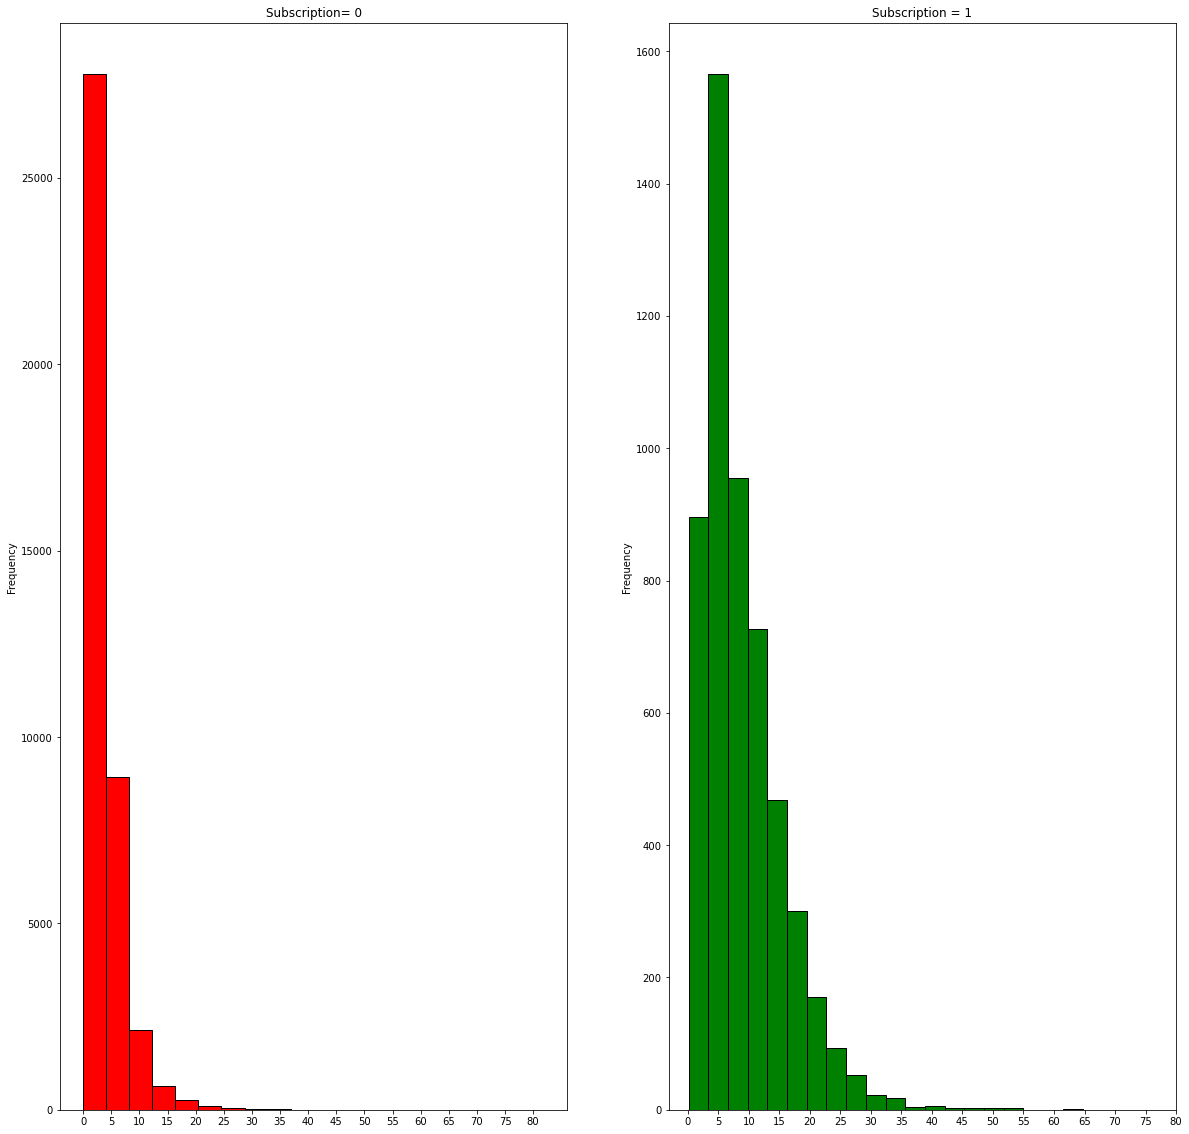

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,20))
data[data['y']==0].duration.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Subscription= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['y']==1].duration.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Subscription = 1')
plt.show()


From the above graph i found:
    max number of people who decline the subscribtion has max call duration of 0 to 5 min and that of people who accept the subscription has call duration of 4 to 7 min

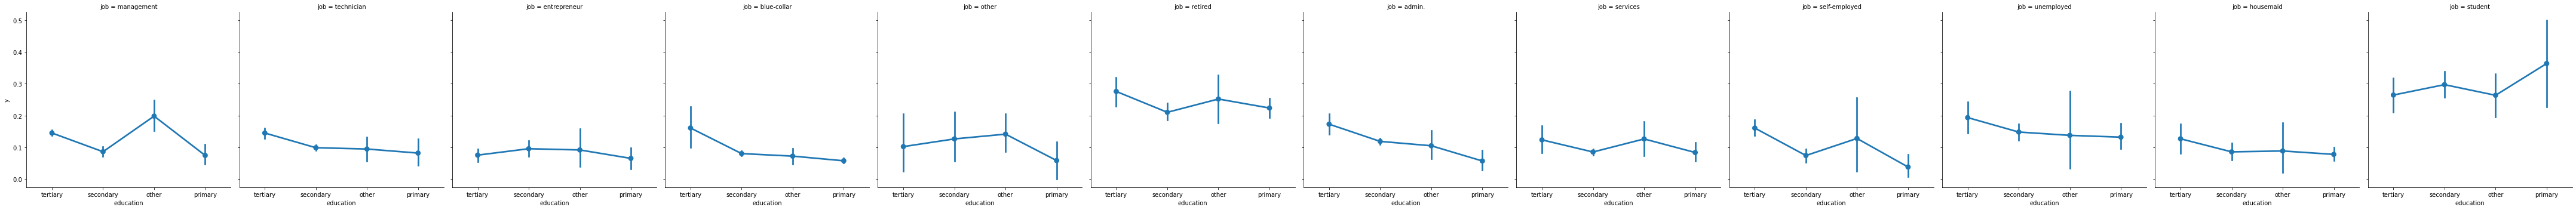

In [28]:
#fig, ax = plt.subplots(figsize=(6, 6))
sns.factorplot('education','y',col='job',data=data)
plt.show()


This factorplot is exciting.As we can see in last figure , subscription rate of students is slightly high than other jobs.

In [29]:
data.groupby(['default', 'y'])['y'].count()

default  y
no       0    39159
         1     5237
yes      0      763
         1       52
Name: y, dtype: int64

In [30]:
pd.crosstab([data.default,data.y],data.housing,margins=True).style.background_gradient(cmap='summer_r')

In [31]:
data.groupby(['loan', 'y'])['y'].count()

loan  y
no    0    33162
      1     4805
yes   0     6760
      1      484
Name: y, dtype: int64

In [32]:
pd.crosstab([data.loan,data.y],data.housing,margins=True).style.background_gradient(cmap='summer_r')

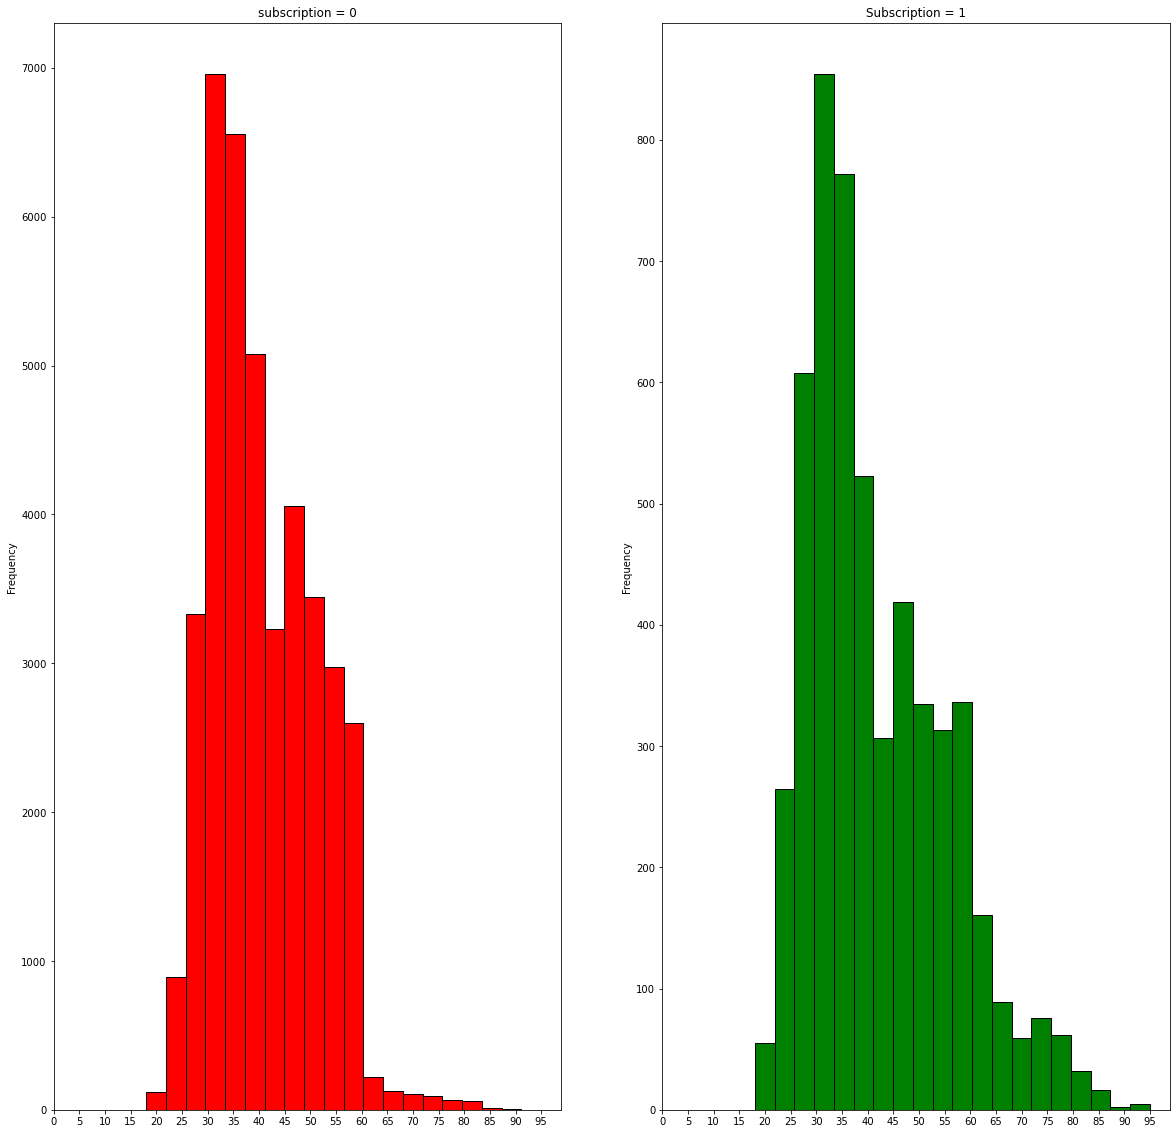

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,20))
data[data['y']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('subscription = 0')
x1=list(range(0,100,5))
ax[0].set_xticks(x1)
data[data['y']==1].age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,100,5))
ax[1].set_xticks(x2)
ax[1].set_title('Subscription = 1')
plt.show()


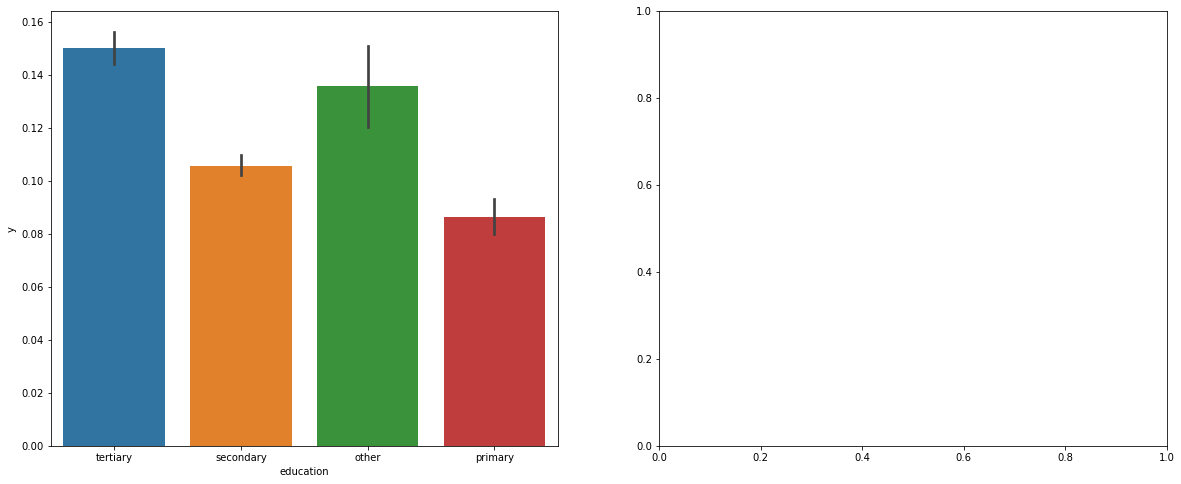

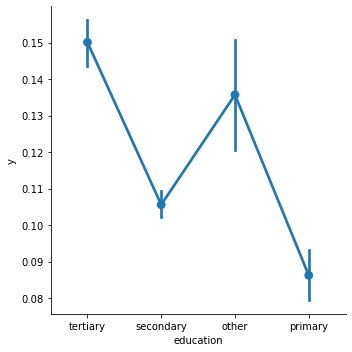

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('education','y', data=data,ax=ax[0])
sns.factorplot('education','y', data=data,ax=ax[1])
#plt.close(1)
plt.show()


<AxesSubplot:xlabel='default', ylabel='y'>

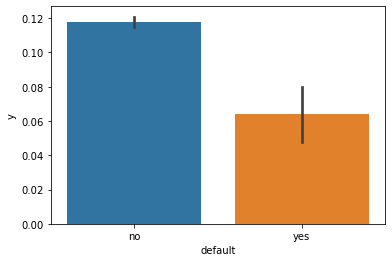

In [35]:
sns.barplot('default','y', data=data)

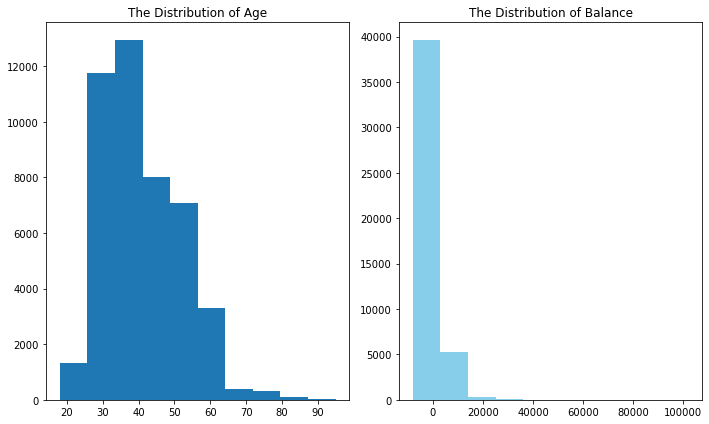

In [36]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(data['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

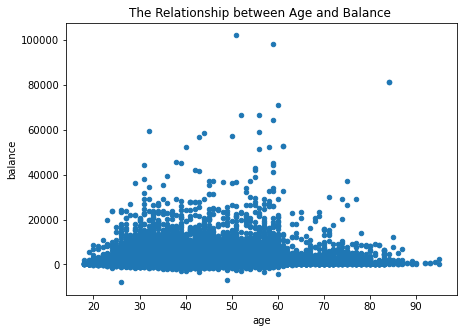

In [37]:
data.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

In [38]:
data.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [39]:
for column in [data]:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

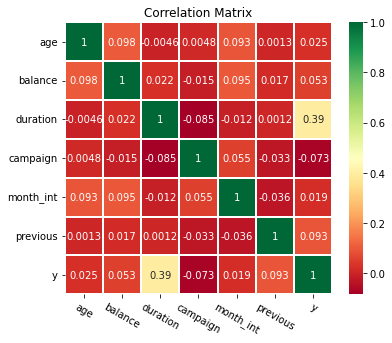

In [40]:
corr_data = data[['age','balance','duration','campaign','month_int','previous','y']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The respond of customer seems to be highly corelated with duration.

In [41]:
data.poutcome.value_counts()#drop garne yeslai

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

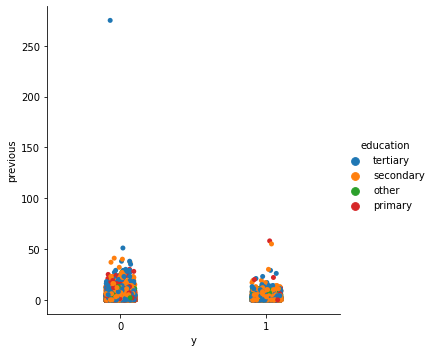

In [42]:
sns.catplot(data=data,x="y",y="previous",hue="education")

<AxesSubplot:xlabel='y', ylabel='previous'>

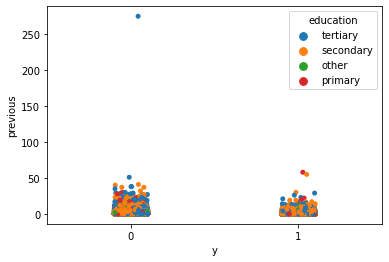

In [43]:
sns.stripplot(data=data,x="y",y="previous",hue="education")

In [44]:
data.pdays.value_counts()#drop

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [45]:
data.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [46]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month_int
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,0,5.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,0,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,0,5.0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,0,5.0
4,33,other,single,other,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,0,5.0


<AxesSubplot:xlabel='month_int', ylabel='y'>

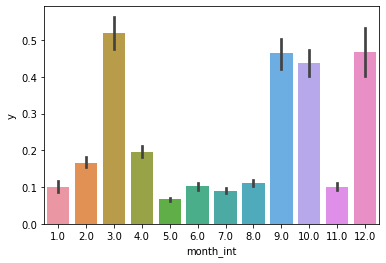

In [47]:
sns.barplot('month_int','y', data=data)

# # Classification Model

Remove independent variables

In [48]:
data.drop(columns=['contact', 'day','pdays','month','poutcome'], inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y,month_int
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,0,0,5.0
1,44,technician,single,secondary,no,29,yes,no,2.52,1,0,0,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,0,0,5.0
3,47,blue-collar,married,other,no,1506,yes,no,1.53,1,0,0,5.0
4,33,other,single,other,no,1,no,no,3.30,1,0,0,5.0


Creating dummy variables

In [49]:
Job = pd.get_dummies(data['job'])
Job

,admin.,blue-collar,entrepreneur,housemaid,management,other,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,0,1,0
45207,0,0,0,0,0,0,1,0,0,0,0,0
45208,0,0,0,0,0,0,1,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [50]:
marital = pd.get_dummies(data['marital'])
marital

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [51]:
education = pd.get_dummies(data['education'])
education

,other,primary,secondary,tertiary
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,1,0,0
45208,0,0,1,0
45209,0,0,1,0


In [52]:
data.default.replace(('yes', 'no'), (1, 0), inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y,month_int
0,58,management,married,tertiary,0,2143,yes,no,4.35,1,0,0,5.0
1,44,technician,single,secondary,0,29,yes,no,2.52,1,0,0,5.0
2,33,entrepreneur,married,secondary,0,2,yes,yes,1.27,1,0,0,5.0
3,47,blue-collar,married,other,0,1506,yes,no,1.53,1,0,0,5.0
4,33,other,single,other,0,1,no,no,3.30,1,0,0,5.0


In [53]:
data.housing.replace(('yes', 'no'), (1, 0), inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y,month_int
0,58,management,married,tertiary,0,2143,1,no,4.35,1,0,0,5.0
1,44,technician,single,secondary,0,29,1,no,2.52,1,0,0,5.0
2,33,entrepreneur,married,secondary,0,2,1,yes,1.27,1,0,0,5.0
3,47,blue-collar,married,other,0,1506,1,no,1.53,1,0,0,5.0
4,33,other,single,other,0,1,0,no,3.30,1,0,0,5.0


In [54]:
data.loan.replace(('yes', 'no'), (1, 0), inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y,month_int
0,58,management,married,tertiary,0,2143,1,0,4.35,1,0,0,5.0
1,44,technician,single,secondary,0,29,1,0,2.52,1,0,0,5.0
2,33,entrepreneur,married,secondary,0,2,1,1,1.27,1,0,0,5.0
3,47,blue-collar,married,other,0,1506,1,0,1.53,1,0,0,5.0
4,33,other,single,other,0,1,0,0,3.30,1,0,0,5.0


In [55]:
data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y,month_int
0,58,management,married,tertiary,0,2143,1,0,4.35,1,0,0,5.0
1,44,technician,single,secondary,0,29,1,0,2.52,1,0,0,5.0
2,33,entrepreneur,married,secondary,0,2,1,1,1.27,1,0,0,5.0
3,47,blue-collar,married,other,0,1506,1,0,1.53,1,0,0,5.0
4,33,other,single,other,0,1,0,0,3.30,1,0,0,5.0


In [56]:
data.drop(columns=['job', 'marital','education'], inplace=True)
data.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,month_int
0,58,0,2143,1,0,4.35,1,0,0,5.0
1,44,0,29,1,0,2.52,1,0,0,5.0
2,33,0,2,1,1,1.27,1,0,0,5.0
3,47,0,1506,1,0,1.53,1,0,0,5.0
4,33,0,1,0,0,3.30,1,0,0,5.0


In [57]:
#data1=[data,Job,marital,education]

In [58]:
df = pd.concat([data,Job,marital,education], axis=1)

In [59]:
df.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,month_int,...,student,technician,unemployed,divorced,married,single,other,primary,secondary,tertiary
0,58,0,2143,1,0,4.35,1,0,0,5.0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,2.52,1,0,0,5.0,...,0,1,0,0,0,1,0,0,1,0
2,33,0,2,1,1,1.27,1,0,0,5.0,...,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,1.53,1,0,0,5.0,...,0,0,0,0,1,0,1,0,0,0
4,33,0,1,0,0,3.30,1,0,0,5.0,...,0,0,0,0,0,1,1,0,0,0


In [60]:
x = df.drop(columns='y', axis=1)
y = df['y']

Using Naive Bayes

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [63]:
client = np.array([[23, 1, 2000, 1, 0, 4.1,1,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1]])

In [64]:
y_cl_dt = model.predict(client)

In [65]:
print("The below output will be 1 if he/she may take the Subscription")
print("Output=", y_cl_dt)

The below output will be 1 if he/she may take the Subscription
Output= [0]


In [66]:
from sklearn.metrics import confusion_matrix#gives precison recall and F1 score
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[7097,  907],
       [ 602,  437]], dtype=int64)

Text(42.0, 0.5, 'Truth')

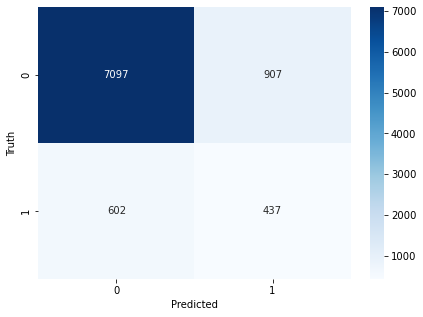

In [67]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      8004
           1       0.33      0.42      0.37      1039

    accuracy                           0.83      9043
   macro avg       0.62      0.65      0.64      9043
weighted avg       0.85      0.83      0.84      9043



Using KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [70]:
y_cl_dt = knn.predict(client)

In [71]:
print("The below output will be 1 if he/she may take the Subscription")
print("Output=", y_cl_dt)

The below output will be 1 if he/she may take the Subscription
Output= [0]


In [72]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[7812,  192],
       [ 877,  162]], dtype=int64)

Text(42.0, 0.5, 'Truth')

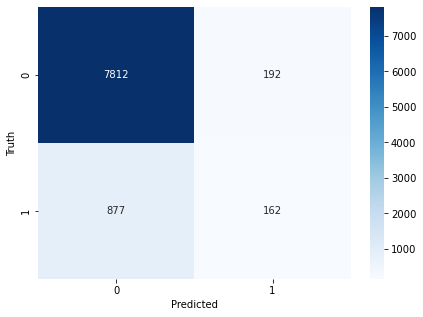

In [73]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
from pandas_profiling import ProfileReport
profile=ProfileReport(data,title="Report")
profile.to_file("mini.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]